In [3]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'cat_dog_data_small/train'
validation_dir = 'cat_dog_data_small/validation'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 16s 159ms/step - loss: 0.6959 - acc: 0.5160 - val_loss: 0.6860 - val_acc: 0.5870
Epoch 2/100
100/100 [==============================] - 15s 148ms/step - loss: 0.6866 - acc: 0.5400 - val_loss: 0.6684 - val_acc: 0.5870
Epoch 3/100
100/100 [==============================] - 15s 146ms/step - loss: 0.6762 - acc: 0.5620 - val_loss: 0.6517 - val_acc: 0.6180
Epoch 4/100
100/100 [==============================] - 14s 139ms/step - loss: 0.6645 - acc: 0.5890 - val_loss: 0.6579 - val_acc: 0.5860
Epoch 5/100
100/100 [==============================] - 14s 145ms/step - loss: 0.6498 - acc: 0.6105 - val_loss: 0.6235 - val_acc: 0.6460
Epoch 6/100
100/100 [==============================] - 15s 149ms/step - loss: 0.6352 - acc: 0.6255 - val_loss: 0.6138 - val_acc: 0.6490
Epoch 7/100
100/100 [==============================] - 15s 145ms/step - loss: 0.6184 - acc: 0.6540 -

In [9]:
model.save('cats_and_dogs_small_2.h5')

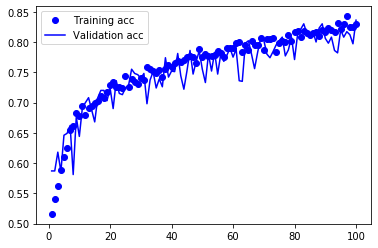

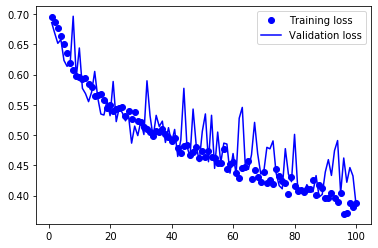

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

plt.show()